<a href="https://colab.research.google.com/github/dinesh-2000/GRIP-TSF-Internship/blob/main/Task_6_pred_using_DTA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load & Read Data**

In [ ]:

data = pd.read_csv('Iris.csv')

print('imported')


imported


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.drop('Id',axis=1,inplace=True)

In [ ]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


# **Splitting data : Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **Prediction**

In [ ]:
y_predict = dtc.predict(x_test)

y_predict

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix(y_test,y_predict)

array([[20,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 11]])

# **Calssification Report**

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.86      0.92        14
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# **Accuracy Score**

In [ ]:
print('Accuracy:',metrics.accuracy_score(y_test,y_predict)*100)

Accuracy: 95.55555555555556


# **Model Visuvalization**

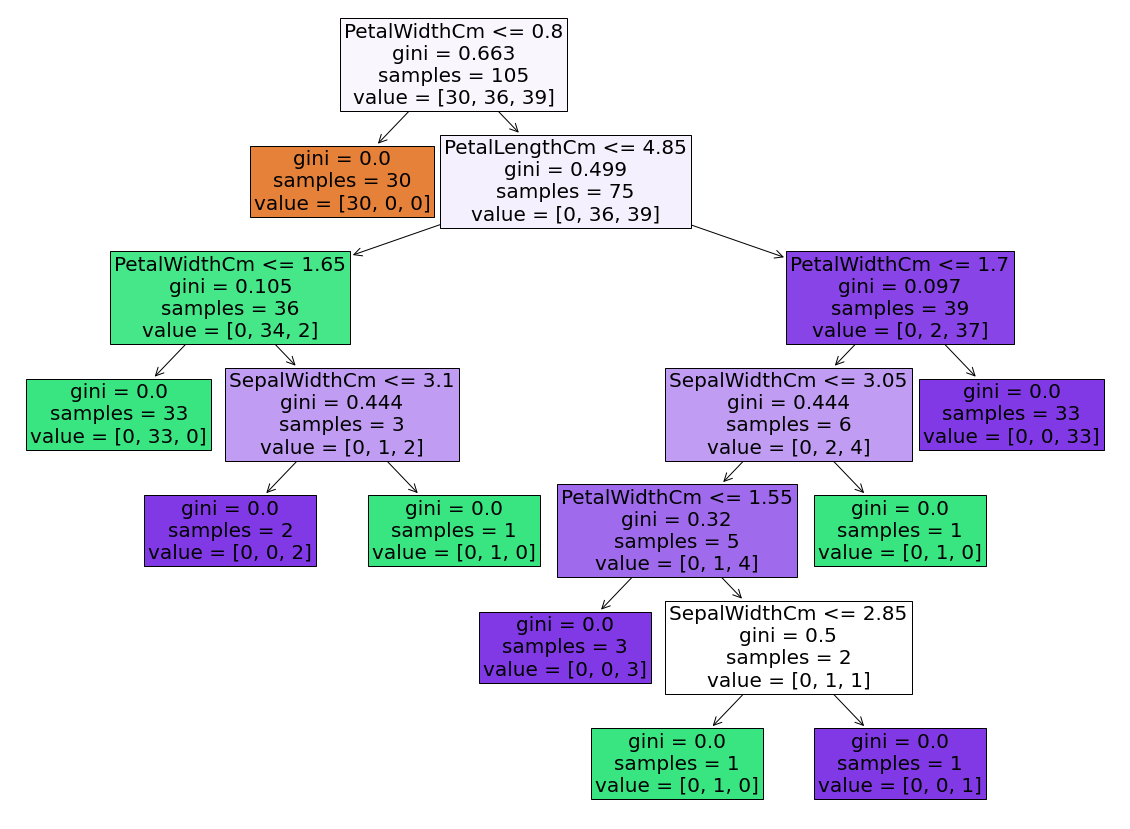

In [ ]:

plt.figure(figsize=(20,15))
dtc_plot = tree.plot_tree(dtc,feature_names=x.columns,filled=True,fontsize=20)

# **Prediction On Randomly Created Data.**

In [ ]:

new_data =  pd.DataFrame({'SepalLengthCm':[4.4,5.4,6.4,5.9,4.8],
                         'SepalWidthCm':[2.1,2.5,3.2,3.5,4.1],
                         'PetalLengthCm':[1.5,2.5,3.5,4.5,5.5],
                         'PetalWidthCm':[0.3,0.7,1.5,1.8,2.2]})
new_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.4,2.1,1.5,0.3
1,5.4,2.5,2.5,0.7
2,6.4,3.2,3.5,1.5
3,5.9,3.5,4.5,1.8
4,4.8,4.1,5.5,2.2


In [ ]:
new_predict = dtc.predict(new_data)

new_data['Predicted_Species'] = new_predict
new_data['Predicted_Species'] = new_data['Predicted_Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.4,2.1,1.5,0.3,Iris-setosa
1,5.4,2.5,2.5,0.7,Iris-setosa
2,6.4,3.2,3.5,1.5,Iris-versicolor
3,5.9,3.5,4.5,1.8,Iris-versicolor
4,4.8,4.1,5.5,2.2,Iris-virginica
